## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [17]:
def sample(Rate,n=1000):
    df = pd.DataFrame({'votes':np.where(np.random.rand(n) < Rate, 'Brown', 'Green')})
    return df.votes.value_counts(normalize=True)

In [18]:
sample(0.51)

Brown    0.527
Green    0.473
Name: votes, dtype: float64

In [30]:
def simulation(Rate,n=1000):
    df = pd.DataFrame([sample(Rate) for i in range(n)])
    return df

In [33]:
dist = simulation(0.51)
dist.head()

,Brown,Green
votes,0.522,0.478
votes,0.507,0.493
votes,0.517,0.483
votes,0.512,0.488
votes,0.536,0.464


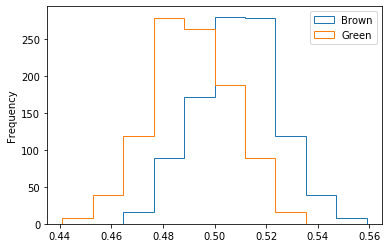

In [34]:
dist.plot(kind='hist',bins=10,histtype='step')

In [35]:
def quantiles(Rate,n=1000):
    dist = simulation(Rate,n)
    return dist.Brown.quantile(0.025),dist.Brown.quantile(0.975)

In [43]:
for i in range(46,56):
    rate = i/100
    
    print(rate, quantiles(rate))

0.46 (0.428975, 0.492)
0.47 (0.44, 0.5000249999999999)
0.48 (0.448, 0.512)
0.49 (0.458975, 0.521025)
0.5 (0.469975, 0.533)
0.51 (0.482, 0.542)
0.52 (0.486975, 0.548)
0.53 (0.5, 0.562)
0.54 (0.511, 0.571)
0.55 (0.517, 0.577)


## 95% confidence range is [0.48, 0.54]